In [35]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from veros.setups.acc_variable_res import ACCResSetup
import matplotlib.pyplot as plt
from veros import VerosSetup, veros_routine
from veros.variables import allocate, Variable
import netCDF4 as nc

In [2]:
    
simulation = ACCResSetup()
simulation.setup()


Running model setup
Initializing streamfunction method
Computing ILU preconditioner...
 Solving for boundary contribution by island 0
 Solving for boundary contribution by island 1
 Running diagnostic "averages" every 33.3 minutes
 Writing output for diagnostic "averages" every 1.0 years
 Running diagnostic "energy" every 33.3 minutes
 Writing output for diagnostic "energy" every 7.6 days
Reading restart data from acc_runs/acc_twelvth_div_coefs/acc_twelvth_div_coefs_10000.restart.h5
Diffusion grid factor delta_iso1 = 100.87875913808064


In [65]:
nrj_avg = nc.Dataset('acc_runs/acc_twelvth_div_coefs/acc_twelvth_div_coefs.energy.nc')

Text(0, 0.5, 'Mean kinetic energy ')

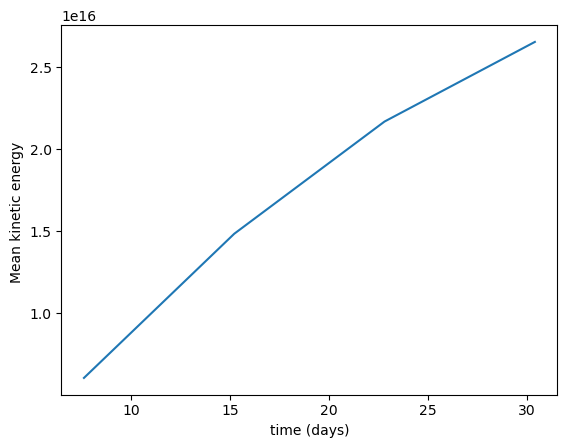

In [66]:
plt.plot(nrj_avg.variables['Time'][:],nrj_avg.variables['k_m'][:])

plt.xlabel("time (days)")
plt.ylabel("Mean kinetic energy ")

In [37]:
nc_avg = nc.Dataset('acc_runs/acc_twelvth_div_coefs/acc_twelvth_div_coefs.averages.nc')

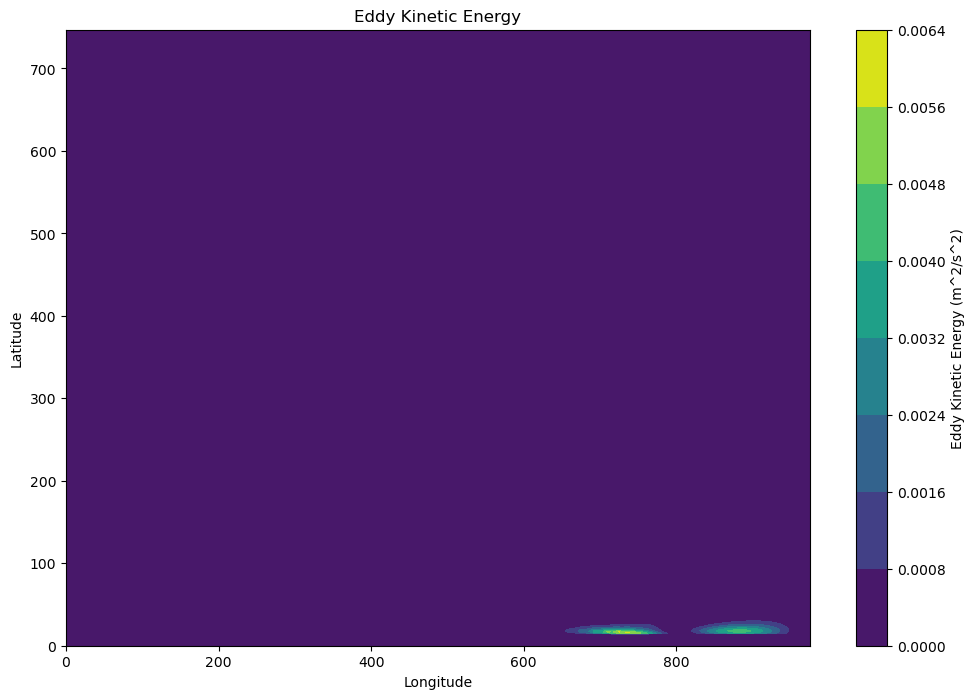

In [43]:
# Load velocity data

u = simulation.state.variables.u[:,:,0,0] * simulation.state.variables.maskU[:,:,0]
v = simulation.state.variables.v[:,:,0,0] * simulation.state.variables.maskV[:,:,0]
eke = 0.5 * (u**2 + v**2)

# Plot EKE
plt.figure(figsize=(12, 8))
plt.contourf(eke, cmap='viridis')
plt.colorbar(label='Eddy Kinetic Energy (m^2/s^2)')
plt.title('Eddy Kinetic Energy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [53]:
vorticity.shape

(748, 976)

In [54]:
simulation.state.variables.xt.shape

(748,)

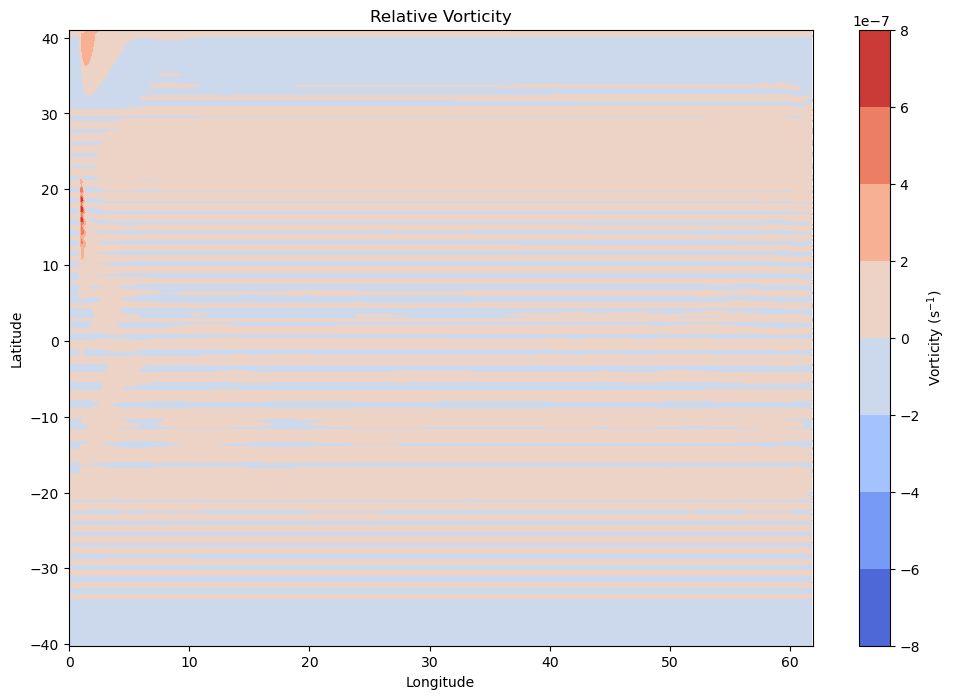

In [64]:
# Calculate vorticity
dvdx = np.gradient(v, axis=1) / simulation.state.variables.dxu[5]
dudy = np.gradient(u, axis=0) / simulation.state.variables.dxu[5]
vorticity = dvdx - dudy
lon_grid, lat_grid = np.meshgrid(simulation.state.variables.xt, simulation.state.variables.yt, indexing = 'ij')
# Plot vorticity
plt.figure(figsize=(12, 8))
plt.contourf(lon_grid, lat_grid, vorticity, cmap='coolwarm')#, levels=np.linspace(-2e-5, 5e-3, 21))
plt.colorbar(label='Vorticity (s$^{-1}$)')
plt.title('Relative Vorticity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [51]:
simulation.state.variables.xt

array([ 6.17916667e+01,  6.18750000e+01, -4.16666667e-02,  4.16666667e-02,
        1.25000000e-01,  2.08333333e-01,  2.91666667e-01,  3.75000000e-01,
        4.58333333e-01,  5.41666667e-01,  6.25000000e-01,  7.08333333e-01,
        7.91666667e-01,  8.75000000e-01,  9.58333333e-01,  1.04166667e+00,
        1.12500000e+00,  1.20833333e+00,  1.29166667e+00,  1.37500000e+00,
        1.45833333e+00,  1.54166667e+00,  1.62500000e+00,  1.70833333e+00,
        1.79166667e+00,  1.87500000e+00,  1.95833333e+00,  2.04166667e+00,
        2.12500000e+00,  2.20833333e+00,  2.29166667e+00,  2.37500000e+00,
        2.45833333e+00,  2.54166667e+00,  2.62500000e+00,  2.70833333e+00,
        2.79166667e+00,  2.87500000e+00,  2.95833333e+00,  3.04166667e+00,
        3.12500000e+00,  3.20833333e+00,  3.29166667e+00,  3.37500000e+00,
        3.45833333e+00,  3.54166667e+00,  3.62500000e+00,  3.70833333e+00,
        3.79166667e+00,  3.87500000e+00,  3.95833333e+00,  4.04166667e+00,
        4.12500000e+00,  

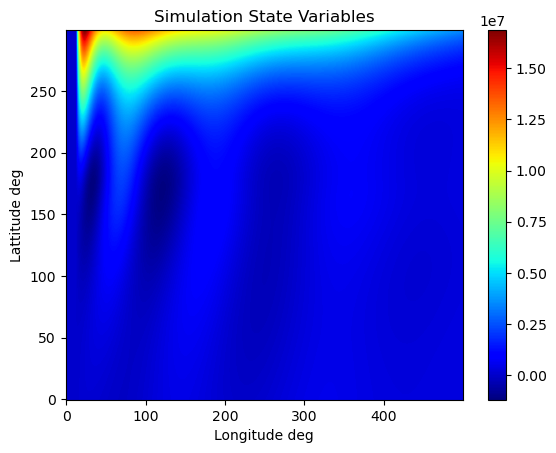

In [29]:
plt.imshow(psi_slice[2:-2,2:-2][:500,300:600].T, cmap='jet',  origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('Longitude deg')
plt.ylabel('Lattitude deg')
plt.title('Simulation State Variables')
plt.show()

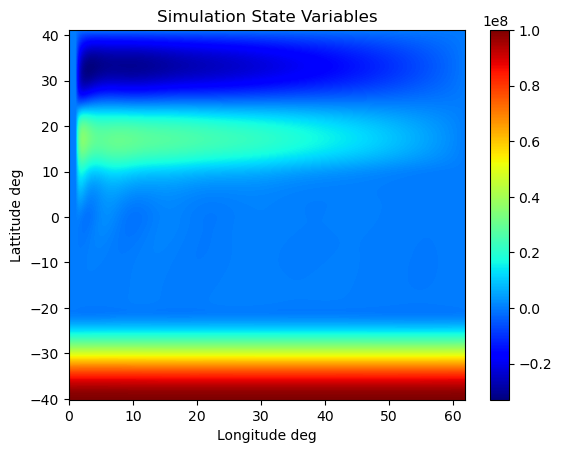

In [11]:
# Define the extent of the plot
extent = [simulation.state.variables.xu.min(), simulation.state.variables.xu.max(), simulation.state.variables.yu.min(), simulation.state.variables.yu.max()]
psi_slice = simulation.state.variables.psi[:,:,0] * simulation.state.variables.maskZ[:,:,0]
# Display the image with the specified extent
plt.imshow(psi_slice[2:-2,2:-2].T, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('Longitude deg')
plt.ylabel('Lattitude deg')
plt.title('Simulation State Variables')
plt.show()

In [20]:
simulation.state.variables.temp.mean(axis = 0).shape

(252, 328, 15, 3)

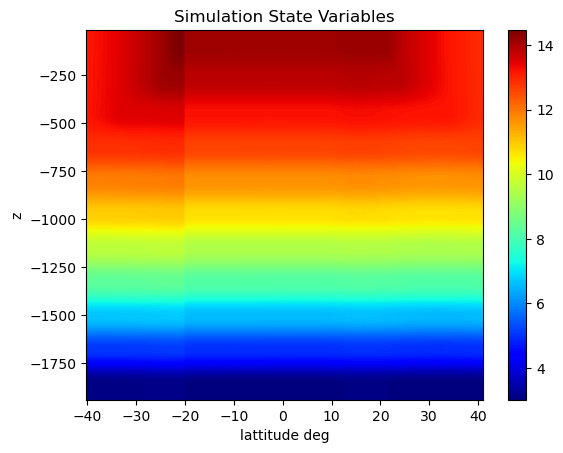

In [5]:
# Define the extent of the plot
extent = [simulation.state.variables.yt.min(), simulation.state.variables.yt.max(), simulation.state.variables.zt.min(), simulation.state.variables.zt.max()]

# Display the image with the specified extent
plt.imshow(simulation.state.variables.temp.mean(axis = 0)[2:-2,2:-2,0].T, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('lattitude deg')
plt.ylabel('z')
plt.title('Simulation State Variables')
plt.show()

# Analysis of energy files 

In [34]:
vm_nrj = nc.Dataset('acc_runs/acc_simulation_quarter/acc_quarter.energy.nc')

In [35]:
vm_nrj.variables.keys()

dict_keys(['xt', 'xu', 'yt', 'yu', 'zt', 'zw', 'tensor1', 'tensor2', 'isle', 'Time', 'k_m', 'Hd_m', 'eke_m', 'iw_m', 'tke_m', 'dE_tot_m', 'dk_m', 'dHd_m', 'deke_m', 'diw_m', 'dtke_m', 'ke_diss_m', 'Hd_diss_m', 'eke_diss_m', 'iw_diss_m', 'tke_diss_m', 'adv_diss_m', 'wind_m', 'dHd_sources_m', 'iw_forc_m', 'tke_forc_m', 'ke_hd_m', 'ke_tke_m', 'ke_iw_m', 'tke_hd_m', 'ke_eke_m', 'hd_eke_m', 'eke_tke_m', 'eke_iw_m', 'cabb_m', 'cabb_iso_m'])

Text(0, 0.5, 'Mean kinetic energy ')

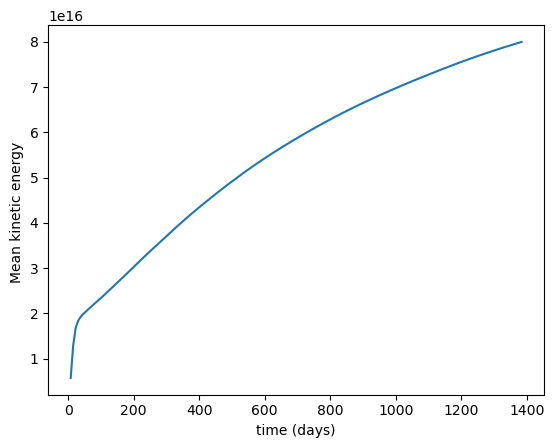

In [52]:
plt.plot(vm_nrj.variables['Time'][:],vm_nrj.variables['k_m'][:])

plt.xlabel("time (days)")
plt.ylabel("Mean kinetic energy ")

Text(0, 0.5, 'Turbulent kinetic energy ')

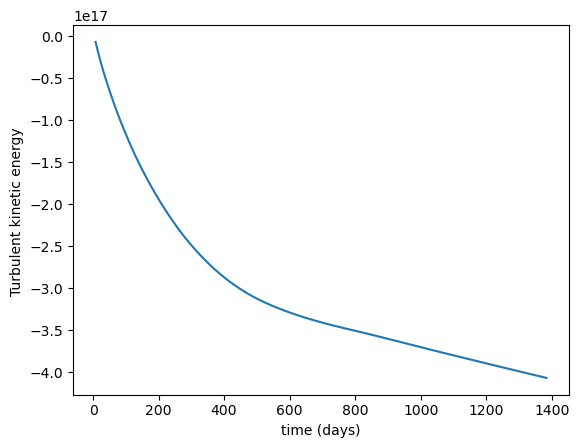

In [49]:
plt.plot(vm_nrj.variables['Time'][:],vm_nrj.variables['tke_m'][:])
plt.xlabel("time (days)")
plt.ylabel("Turbulent kinetic energy ")

Text(0, 0.5, 'Meso-scale eddy energy')

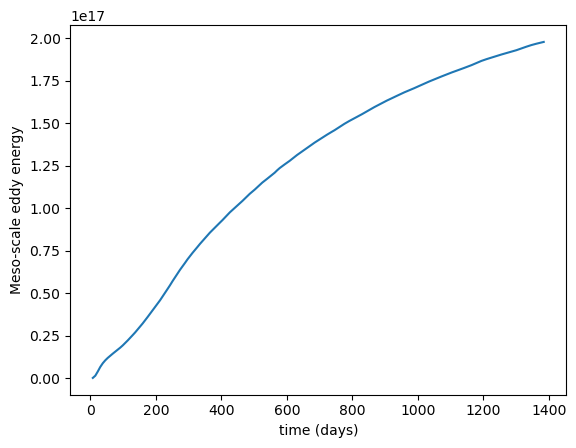

In [51]:
plt.plot(vm_nrj.variables['Time'][:],vm_nrj.variables['eke_m'][:])
plt.xlabel("time (days)")
plt.ylabel("Meso-scale eddy energy")

In [50]:
vm_nrj.variables['eke_m']

<class 'netCDF4._netCDF4.Variable'>
float64 eke_m(Time)
    _FillValue: -1e+18
    long_name: Meso-scale eddy energy
    units: J
unlimited dimensions: Time
current shape = (182,)
filling on

In [54]:
simulation.state.variables.dHd

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+0